## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [2]:
!head Data/countries_info.csv

'head' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [4]:
# Write your code here
happiness = pd.read_csv(HAPPINESS_DATASET)
print(happiness.dtypes)
happiness.head()

country                      object
happiness_score             float64
social_support              float64
healthy_life_expectancy     float64
freedom_of_choices          float64
generosity                  float64
perception_of_corruption    float64
world_region                 object
dtype: object


,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [5]:
countries = pd.read_csv(COUNTRIES_DATASET)
print(countries.dtypes)
countries.head()

country_name    object
area             int64
population       int64
literacy        object
dtype: object


,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"
3,argentina,2766890,39921833,"97,1"
4,armenia,29800,2976372,"98,6"


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [6]:
country_features = pd.concat([happiness, countries], axis = 1)
country_features.drop('country_name', axis = 'columns', inplace = True)
print(len(country_features))
country_features.head()

135


,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,"36,0"
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,"86,5"
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,"70,0"
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,"97,1"
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,"98,6"


In [7]:
# Write your code here

#countries.columns = ['country', 'area', 'population', 'literacy']
#countries.set_index('country', inplace=True)
#countries.columns = ['country', 'area', 'population', 'literacy']
print(f'Number of rows of happiness df : {len(happiness)}')
print(f'Number of rows of countries df : {len(countries)}')
#country_features = pd.merge(happiness, countries)
#country_features = pd.merge(happiness, countries, left_on='country', right_index='country')
#print(len(country_features))
#country_features.head()

Number of rows of happiness df : 135
Number of rows of countries df : 135


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [8]:
# Write your code here
idx = country_features['happiness_score'].sort_values(ascending=False).head(10).index
print(country_features.iloc[idx][['country', 'happiness_score']])

         country  happiness_score
38       Finland           7.8087
31       Denmark           7.6456
115  Switzerland           7.5599
50       Iceland           7.5045
92        Norway           7.4880
87   Netherlands           7.4489
114       Sweden           7.3535
88   New Zealand           7.2996
6        Austria           7.2942
72    Luxembourg           7.2375


We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [9]:
# Write your code here
task_3 = pd.DataFrame(index  = country_features['world_region'].unique(), columns=['avg HS', '# countries'])
task_3['avg HS'] = country_features.groupby('world_region').apply(lambda x: x['happiness_score'].mean())
task_3['# countries'] = country_features.groupby('world_region').apply(lambda x: len(x))
task_3.sort_values(by = 'avg HS', ascending=False, inplace=True)
#check
print(task_3['# countries'].sum())
task_3.head(10)

135


,avg HS,# countries
North America and ANZ,7.173525,4
Western Europe,6.967405,20
Latin America and Caribbean,5.971280,20
Central and Eastern Europe,5.891393,14
Southeast Asia,5.517788,8
East Asia,5.483633,3
Commonwealth of Independent States,5.358342,12
Middle East and North Africa,5.269306,16
Sub-Saharan Africa,4.393856,32
South Asia,4.355083,6


The first region has only a few countries! What are them and what is their score?

In [10]:
# Write your code here
countries_happiest_region = country_features[country_features['world_region'] == task_3.index[0]]
countries_happiest_region.head()
print(f'The first happiest region is {task_3.index[0]}, which includes :\n')
for country in countries_happiest_region['country']:
    HS = countries_happiest_region[countries_happiest_region['country']== country]['happiness_score'].values[0]
    print(f'{country} with a happiness score of {HS.round(3)}')

The first happiest region is North America and ANZ, which includes :

Australia with a happiness score of 7.223
Canada with a happiness score of 7.232
New Zealand with a happiness score of 7.3
United States with a happiness score of 6.94


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [11]:
# Write your code here
perfect_literacy = country_features[country_features['literacy'] == '100,0']
for i in np.arange(len(perfect_literacy)):
    #country_region = country_features[country_features['country'] == country]['world_region']
    #country_HS = country_features[country_features['country'] == country]['happiness_score'].values[0]
    country = perfect_literacy.iloc[i]['country']
    country_region = perfect_literacy.iloc[i]['world_region']
    country_HS = perfect_literacy.iloc[i]['happiness_score']
    print(f'{country_region} - {country} ({country_HS.round(3)})')

North America and ANZ - Australia (7.223)
Western Europe - Denmark (7.646)
Western Europe - Finland (7.809)
Western Europe - Luxembourg (7.238)
Western Europe - Norway (7.488)


What is the global average?

In [12]:
# Write your code here
country_features_copy = country_features.copy()
country_features_copy.dropna(subset = ['literacy'], inplace=True)
country_features_copy['literacy'] = country_features_copy['literacy'].str.replace(',', '.').astype(float)  # change literacy columns from object type to float64
#country_features_copy.dtypes
global_avg_literacy = country_features_copy['literacy'].mean()
print(f'The global average literacy is {global_avg_literacy.round(3)}')

The global average literacy is 81.851


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [13]:
# Write your code here
print(f'We have {len(country_features_copy)} countries with literacy data')
low_literacy = country_features_copy[country_features_copy['literacy'] < 50]
proportion = len(low_literacy)/len(country_features_copy)
print(f'Proportion of countries with literacy level below 50% : {np.round(proportion,2)}')
low_literacy.head()

We have 133 countries with literacy data
Proportion of countries with literacy level below 50% : 0.12


,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0
9,Bangladesh,4.8328,0.687293,64.503067,0.900625,-0.033665,0.661844,South Asia,144000,147365352,43.1
12,Benin,5.2160,0.468671,54.312466,0.735183,-0.003537,0.740533,Sub-Saharan Africa,112620,7862944,40.9
17,Burkina Faso,4.7687,0.712944,53.889454,0.665564,-0.019081,0.739795,Sub-Saharan Africa,274200,13902972,26.6
22,Chad,4.4227,0.632388,48.220539,0.587305,0.017835,0.802761,Sub-Saharan Africa,1284000,9944201,47.5


Print the raw number and the percentage of world population that is illiterate.

In [14]:
# Write your code here
num_illiterate = (((100 - country_features_copy['literacy'])/100) * country_features_copy['population']).sum()
proportion_illiterate = num_illiterate/country_features_copy['population'].sum()
print(f'Raw number of illiterate in the world : {num_illiterate}, which represents {proportion_illiterate.round(3)} of the world population')

Raw number of illiterate in the world : 1249372988.103, which represents 0.204 of the world population


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [15]:
# Write your code here
country_features['population_density'] = country_features['population']/country_features['area']
print(len(country_features))
country_features.head()

135


,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy,population_density
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,"36,0",47.964474
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,"86,5",124.587971
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,"70,0",13.826065
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,"97,1",14.428413
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,"98,6",99.878255


What is the happiness score of the 3 countries with the lowest population density?

In [16]:
# Write your code here
country_features.sort_values(by = 'population_density', ascending=True).head(3)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy,population_density
83,Mongolia,5.4562,0.937142,62.304485,0.693351,0.098094,0.863511,East Asia,1564116,2832224,"97,8",1.810751
5,Australia,7.2228,0.944855,73.604538,0.915432,0.190460,0.415169,North America and ANZ,7686850,20264082,"100,0",2.636201
14,Botswana,3.4789,0.779122,58.924454,0.821328,-0.250394,0.777931,Sub-Saharan Africa,600370,1639833,"79,8",2.731371


## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

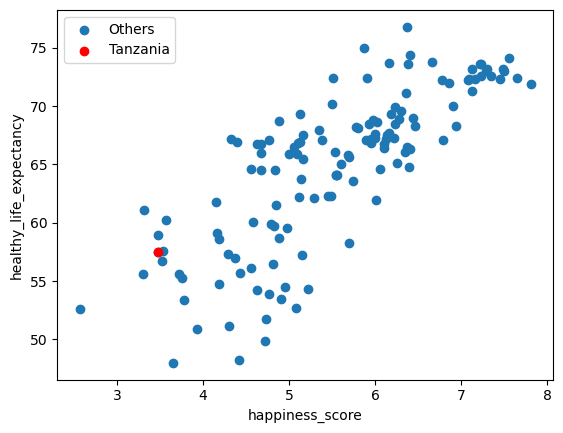

In [21]:
plt.scatter(x= country_features['happiness_score'], y= country_features['healthy_life_expectancy'], label= 'Others')
country_to_plot = 'Tanzania'
plt.scatter(country_features[country_features['country']==country_to_plot]['happiness_score'], country_features[country_features['country']==country_to_plot]['healthy_life_expectancy'], color='red', label=country_to_plot)
plt.xlabel('happiness_score')
plt.ylabel('healthy_life_expectancy')
plt.legend()

0 happiness_score
1 social_support
2 freedom_of_choices
3 generosity
4 perception_of_corruption
5 area
6 population
7 literacy


TypeError: 'value' must be an instance of str or bytes, not a float

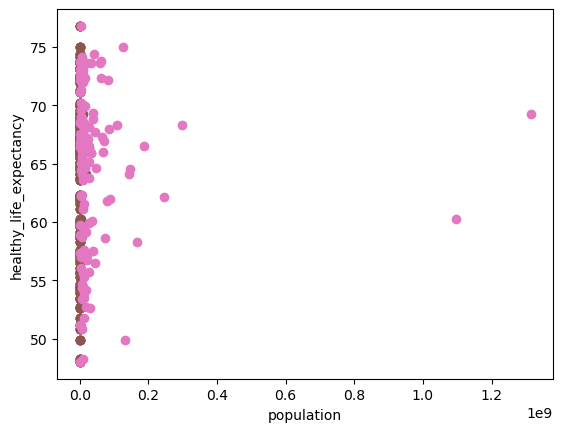

In [20]:
# Write your code here
#fig, axs = plt.subplots(1,9, figsize = (10,5))

for i, cat in enumerate(['happiness_score', 'social_support', 'freedom_of_choices', 'generosity', 'perception_of_corruption', 'area', 'population', 'literacy']):
    print(i,cat)
    plt.scatter(x= country_features[cat], y= country_features['healthy_life_expectancy'])
        #country_to_plot = 'Afghanistan'
        #plt.scatter(country_features[country_features['country']==country_to_plot]['happiness_score'], country_features[country_features['country']==country_to_plot]['generosity'], color='red', label=country_to_plot)
    plt.xlabel(cat)
    plt.ylabel('healthy_life_expectancy')
    
plt.legend()

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.